<a href="https://colab.research.google.com/github/Ignas12345/Magistro_projektas/blob/main/TCGA_duomenu_apdorojimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [13]:
url = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/counts_combined.csv'
df = pd.read_csv(url)
df.head()

,miRNA_ID,read_count_TCGA-2G-AAG5-01A-11R-A439-13,read_count_TCGA-2G-AAG6-01A-11R-A439-13,read_count_TCGA-2G-AAGY-05A-11R-A439-13,read_count_TCGA-2G-AAGY-01A-11R-A439-13,read_count_TCGA-2G-AAGV-01A-11R-A439-13,read_count_TCGA-2G-AAGX-01A-11R-A439-13,read_count_TCGA-2G-AAFE-01A-11R-A439-13,read_count_TCGA-2G-AAGA-01A-11R-A439-13,read_count_TCGA-ZM-AA05-01A-12R-A43A-13,...,read_count_TCGA-WZ-A7V3-01A-11R-A43A-13,read_count_TCGA-2G-AAH3-01A-11R-A439-13,read_count_TCGA-4K-AA1I-01A-11R-A439-13,read_count_TCGA-S6-A8JX-01A-11R-A439-13,read_count_TCGA-SO-A8JP-01A-11R-A43A-13,read_count_TCGA-2G-AAFZ-01A-11R-A439-13,read_count_TCGA-XE-AANR-01A-11R-A43A-13,read_count_TCGA-XE-AAOJ-01A-12R-A43A-13,read_count_TCGA-2G-AAHG-01A-11R-A439-13,read_count_TCGA-2G-AAGP-01A-11R-A439-13
0,hsa-let-7a-1,98880,199771,14494,39072,127522,151508,40018,36309,62307,...,7584,30863,21545,7863,19993,60411,35383,33557,10810,70818
1,hsa-let-7a-2,98726,199757,14791,38979,126858,152317,39735,36097,61796,...,7509,30875,21129,8188,20023,60324,35142,33459,10725,70561
2,hsa-let-7a-3,99331,202322,14662,39183,128460,152572,40299,36326,62537,...,7638,30853,21440,8142,20107,60271,35164,33762,10830,71303
3,hsa-let-7b,144954,257771,15110,41688,108708,185933,41846,44154,49137,...,7979,38504,24463,17472,30699,57144,77662,34885,15229,95517
4,hsa-let-7c,107229,326967,2614,59663,479042,366449,6560,17224,5367,...,283,6766,4421,3387,4990,63271,29257,62214,3600,52257


In [ ]:
df = df.drop(df.columns[0], axis=1)


In [ ]:
full_data = df.to_numpy(dtype = np.int32)

In [ ]:
print(full_data)
print(np.shape(full_data))

In [ ]:
filtered_data = full_data[~np.all(full_data == 0, axis=1)]
print(np.shape(filtered_data))

In [33]:
print(filtered_data[1420,:])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


In [ ]:
#duomenu "suplokstinimas"/vizualizacija naudojantis principine komponentu analize (PCA)
pca = PCA(n_components=15)
pca_data = pca.fit_transform(filtered_data.T)

plt.scatter(pca_data[6:139, 0], pca_data[6:139, 1], c = 'r', label = 'Other')
plt.scatter(pca_data[0:6, 0], pca_data[0:6, 1], c = 'b', label = 'Teratoma, benign')
plt.xlabel('Principinis komponentas 1')
plt.ylabel('Principinis komponentas 2')
plt.legend()
plt.show()

In [ ]:
plt.scatter(pca_data[6:139, 3], pca_data[6:139, 4], c = 'r', label = 'Other')
plt.scatter(pca_data[0:6, 3], pca_data[0:6, 4], c = 'b', label = 'Teratoma, benign')
plt.xlabel('Principinis komponentas 3')
plt.ylabel('Principinis komponentas 4')
plt.legend()
plt.show()

In [39]:
#susicentruojam duomenis, jei reikia
X=filtered_data.T
X = X - np.mean(X, axis = 0)
print(X)

[[ 6.28072734e+04  6.26860719e+04  6.30771799e+04 ...  7.24129496e+02
   1.81667626e+04  2.15782122e+05]
 [ 1.63698273e+05  1.63717072e+05  1.66068180e+05 ...  1.94512950e+03
   8.03177626e+04  4.52109122e+05]
 [-2.15787266e+04 -2.12489281e+04 -2.15918201e+04 ... -2.35870504e+02
  -7.87823741e+03 -1.38845878e+05]
 ...
 [-2.51572662e+03 -2.58092806e+03 -2.49182014e+03 ...  7.11129496e+02
   6.98176259e+03  5.38535122e+05]
 [-2.52627266e+04 -2.53149281e+04 -2.54238201e+04 ... -2.48870504e+02
  -6.05323741e+03 -1.46251878e+05]
 [ 3.47452734e+04  3.45210719e+04  3.50491799e+04 ...  2.53129496e+02
   4.72776259e+03  7.43821223e+04]]


pvz, genas 1000 neblogai atskleidzia

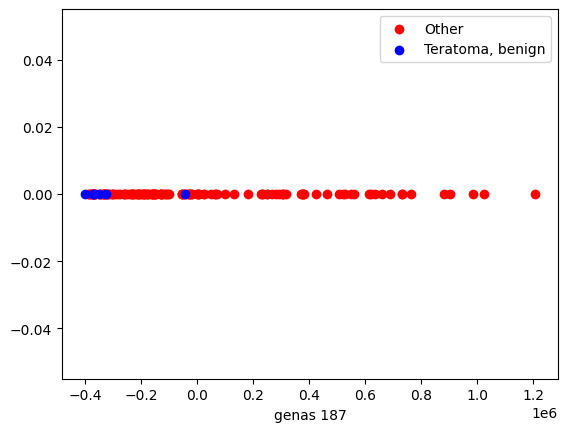

In [43]:
i = 187
plt.scatter(X[6:139, i], np.zeros(len(X[6:139, 0])), c = 'r', label = 'Other')
plt.scatter(X[0:6, i], np.zeros(len(X[0:6, 0])), c = 'b', label = 'Teratoma, benign')
plt.xlabel('genas ' + str(i))
plt.legend()
plt.show()

pabandom surasti miRNR, kuriu raiska labiausiai skiriasi

In [41]:
Ter = X[0:6]
print(np.shape(Ter))
teratoma_benign_means = np.mean(Ter, axis = 0)
all_means = np.mean(X, axis = 0)

print(np.shape(teratoma_benign_means))
print(np.shape(all_means))

(6, 1546)
(1546,)
(1546,)


In [42]:
# Example array
arr = teratoma_benign_means - all_means

# Get sorted indices based on absolute values
sorted_indices = np.argsort(-np.abs(arr))

# Sort the array based on absolute values
sorted_array = arr[sorted_indices]

#print("Original array:", arr)
#print("Sorted array:", sorted_array)
print("Sorted indices:", sorted_indices[0:20])

Sorted indices: [ 152  259  239  187  161 1545    4   24  303   13  222  221   23  154
    3  220  230  189   88    2]
